Prompt 1: 0.00% de cumplimiento
Prompt 2: 24.97% de cumplimiento
Prompt 3: 4.98% de cumplimiento
Prompt 4: 4.70% de cumplimiento
Prompt 5: 8.80% de cumplimiento
Prompt 6: 3.58% de cumplimiento
Prompt 7: 1.31% de cumplimiento
Prompt 8: 99.85% de cumplimiento
Prompt 9: 95.82% de cumplimiento
Prompt 10: 96.37% de cumplimiento
Prompt 11: 99.86% de cumplimiento


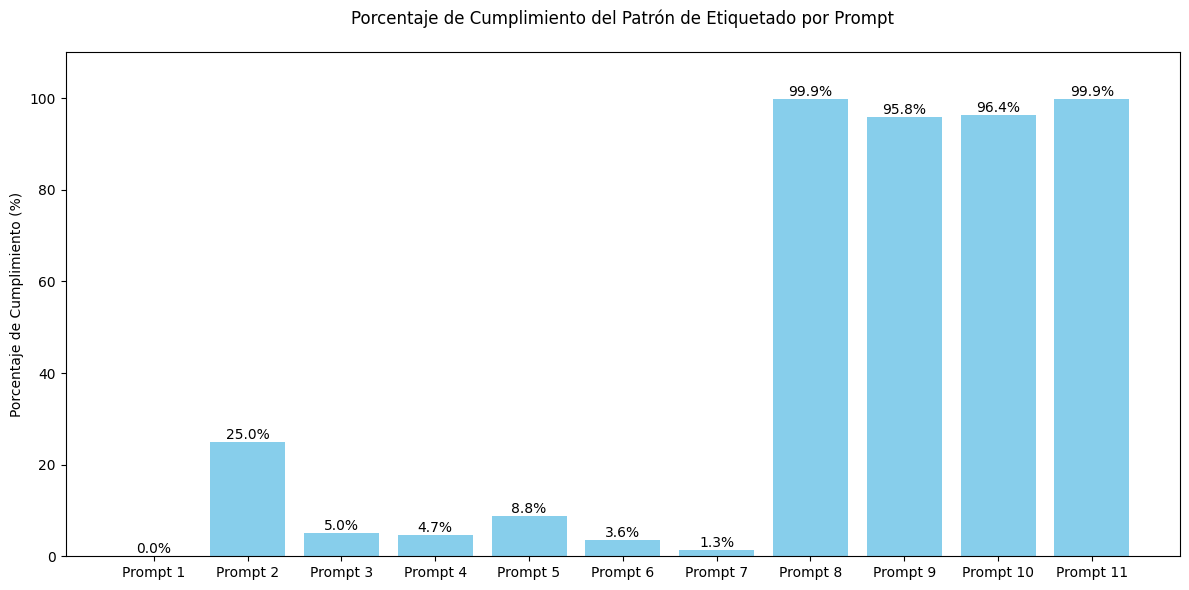

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tagStats import calculate_tag_quality

base_dir = "systemLlama3.3"
prompt_dirs = [f"{base_dir}/prompt{i}" for i in range(1, 12)]  # prompt1 a prompt11

# Asignación de patrones correctos a cada prompt
pattern_assignments = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1,  # prompts 1-7 usan pattern 1
    8: 2, 11: 2,                                # prompts 8 y 11 usan pattern 2
    9: 3,                                       # prompt 9 usa pattern 3
    10: 4                                       # prompt 10 usa pattern 4
}

metrics = []
for i, prompt_dir in enumerate(prompt_dirs, start=1):
    pattern_num = pattern_assignments.get(i, 1)  # Por defecto pattern 1 si no está especificado
    try:
        result = calculate_tag_quality(prompt_dir, pattern_num)
        metrics.append(result['quality_metric']*100)  # Convertir a porcentaje
        print(f"Prompt {i}: {metrics[-1]:.2f}% de cumplimiento")
    except Exception as e:
        print(f"Error procesando {prompt_dir}: {e}")
        metrics.append(0)  # En caso de error, asumir 0%

# %% [markdown]
"""
## Visualización de los resultados
"""
# %%
# Configuración del gráfico
plt.figure(figsize=(12, 6))
x_labels = [f"Prompt {i}" for i in range(1, 12)]
x_pos = np.arange(len(x_labels))

# Crear el gráfico de barras
bars = plt.bar(x_pos, metrics, color='skyblue')

# Añadir los valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Porcentaje de Cumplimiento del Patrón de Etiquetado por Prompt', pad=20)
plt.ylabel('Porcentaje de Cumplimiento (%)')
plt.xticks(x_pos, x_labels)
plt.ylim(0, 110)  # Dejar espacio para los textos superiores

# Mostrar el gráfico
plt.tight_layout()
plt.show()